# Intrdocution
In this notebook, we perform analysis over a restaurant dataset that contains restaurants information in the Los Angeles Area scraped from Yelp and Tripadvisor websites. In particular, we focus on comparing restaurant ratings and reviews from the two sources of websites.

# Dataset Description
The dataset we compiled include tuples that describe a restaurant. Each restaurant has descriptive attributes such as name, address, category, category by region, category by food, and website specific data rating, price, and review counts.

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# set seaborn plotting style
sns.set(style = "whitegrid", font_scale=1.3)

# load data
data = pd.read_csv('E.csv')
data = data.iloc[:,0:18]  # remove uneccessary attributes (hours)
data.head(4)

,id,name,city,zipcode,address,phone,category,category_loc,category_food,price,rating,review_count,price_yelp,rating_yelp,review_count_yelp,price_trip,rating_trip,review_count_trip
0,0,Hae Jang Chon Korean BBQ Restaurant,Los Angeles,90020.0,3821 W 6th St,2.133899e+09,barbecue,korean,barbecue,2.0,4.25,4048,2.0,4.0,3970,2.5,4.5,78
1,1,Kang Hodong Baekjeong,Los Angeles,90020.0,3465 W 6th St,2.133850e+09,barbecue,korean,barbecue,2.0,4.50,3646,2.0,4.5,3533,2.5,4.5,113
2,3,EMC Seafood and Raw Bar,Los Angeles,90020.0,3500 W 6th St,2.133520e+09,seafood,other,seafood,2.0,4.25,2963,2.0,4.0,2890,2.5,4.5,73
3,4,Beer Belly,Los Angeles,90020.0,532 S Western Ave,2.133872e+09,american,american,other,2.0,4.00,2274,2.0,4.0,2165,2.5,4.0,109


There are three different attributes describing the type of restaurants. The "cateogry_loc" attribute categories restaurants by their region of origin, such as "american", "japanese", "mexican". The "category_food" attribute differentiate restaurants by the type of food they serve, such as "barbecue", "seafood", "pizza". The "category" attribute combines the above two categories, because none of them is able to fully describe all the types of restuarants.

In [3]:
data['category'].value_counts()

american              139
breakfast & brunch     74
cafe                   67
sushi                  60
seafood                59
pizza                  57
mexican                54
other                  43
fast food              43
barbecue               38
japanese               34
italian                31
bars                   30
burger                 29
mediterranean          27
thai                   27
steakhouse             26
chinese                20
vietnamese             13
asian other            12
korean                 11
Name: category, dtype: int64

In [4]:
data['category_loc'].value_counts()

american         378
japanese         100
italian           89
other             83
mexican           78
mediterranean     33
chinese           31
korean            30
thai              29
vietnamese        15
indian            10
french             9
brazilian          9
Name: category_loc, dtype: int64

In [5]:
data['category_food'].value_counts()

other                 393
breakfast & brunch     74
cafe                   67
sushi                  60
seafood                59
pizza                  57
fast food              43
barbecue               38
bars                   30
burger                 29
steakhouse             26
ramen                  18
Name: category_food, dtype: int64

# Analysis
Based on the dataset, we uses correlation, OLAP style analysis, and various data visualization tools to answer the question: how the ratings and reviews about the same restaurant differ in the two website (Yelp and Tripadivor)?

## Comparison of restaurant ratings between Yelp and Tripadvisor
In this section, we focuses on the how the ratings of restaurants differ in Yelp and Tripadvisor. We analyze this question based on all restaurants and restaurants in different categories.

### Ratings of all restaurants
We computed the count of restaurants within each pair of rating categories in Yelp and Tripadvisor. This is an OLAP style analysis, by rolling up the restaurant ID dimension.

We presented the results in a barplot, grouped by ratings in Yelp, and each bar shows the percentage of restaurants falling in a rating group of Tripadvisor.

<Figure size 432x288 with 0 Axes>

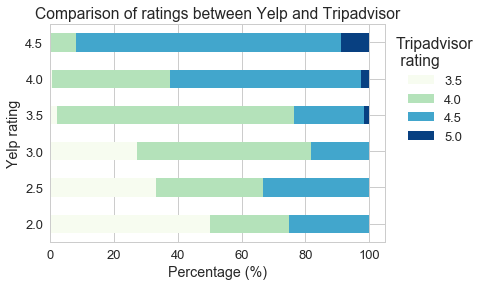

In [14]:
# perform rolling up
rating_corr = pd.crosstab(data['rating_yelp'],data['rating_trip'])
rating_corr_perct = pd.crosstab(data['rating_yelp'],data['rating_trip'], 
                                normalize = 'index') * 100
# create a bar plot to show the result
plt.figure()
gr1 = rating_corr_perct.plot(kind = 'barh',stacked = True, colormap = 'GnBu', legend = False)
gr1.legend(loc = 'upper right',title = 'Tripadvisor\n rating',bbox_to_anchor=(1.3, 1))
gr1.set_xlabel("Percentage (%)")
gr1.set_ylabel('Yelp rating')
gr1.set_title('Comparison of ratings between Yelp and Tripadvisor')
plt.show()

In the figure, we find that the restaurant ratings of tripadvisor is generally correlated with that of yelp. Because for higher yelp rating group, the percentage of restuarant with high rate in tripadvisor is also higher. For example, 5 rating resturants in Tripadvisor are mostly rated 4.5 by yelp. The majority of 4.5 rated restaurants in Tripadvisor is also rated 4.5 by Yelp. However, there is also some discrepancies. It is not hard to find out that Tripadvisor rating is consistenly higher that of Yelp.
<br><br>
Now, let's look at some interesting cases, namely, restaurants that are 5 rating in Tripadvisor by only 3.5 grade by Yelp. One can see that these restaurants were not reviewed by a lot of people in both websites, especially Tripadvisor, therefore, the ratings might be biased.

In [15]:
data[(data['rating_yelp']==3.5) & (data['rating_trip']==5)]

,id,name,city,zipcode,address,phone,category,category_loc,category_food,price,rating,review_count,price_yelp,rating_yelp,review_count_yelp,price_trip,rating_trip,review_count_trip
239,242,Normandie Pate,Los Angeles,90016.0,3022 S Cochran Ave,3.239396e+09,cafe,french,cafe,2.0,4.25,153,2.0,3.5,147,NaN,5.0,6
430,435,Tamales Liliana,Los Angeles,90063.0,3448 E 1st St,3.237801e+09,mexican,mexican,other,1.0,4.25,92,1.0,3.5,86,NaN,5.0,6
746,752,Mom's Bar-B-Q,Los Angeles,90044.0,1050 W Imperial Hwy,3.237568e+09,barbecue,american,barbecue,2.0,4.25,117,2.0,3.5,112,1.0,5.0,5
875,883,Ronald Reagan UCLA Medical Center - Cafeteria,Los Angeles,90095.0,757 Westwood Plz,3.108259e+09,other,other,other,1.0,4.25,80,1.0,3.5,75,NaN,5.0,5


Here are restaurants that recieve the highest rating in both websites (a dice operation).

In [16]:
data[(data['rating_yelp']==4.5) & (data['rating_trip']==5)]

,id,name,city,zipcode,address,phone,category,category_loc,category_food,price,rating,review_count,price_yelp,rating_yelp,review_count_yelp,price_trip,rating_trip,review_count_trip
168,170,Bronzed Aussie,Los Angeles,90014.0,714A S Los Angeles St,2.132431e+09,other,other,other,1.0,4.75,601,1.0,4.5,582,1.0,5.0,19
176,178,Revolutionario Tacos,Los Angeles,90007.0,1436 W Jefferson Blvd,4.242234e+09,mexican,mexican,other,1.0,4.75,422,1.0,4.5,416,NaN,5.0,6
184,187,Holbox,Los Angeles,90007.0,3655 S Grand Ave,2.139870e+09,seafood,other,seafood,2.0,4.75,145,2.0,4.5,141,NaN,5.0,4
267,271,Courtyard Cafe,Los Angeles,90045.0,8939 S Sepulveda Blvd,3.104101e+09,cafe,american,cafe,1.0,4.75,153,1.0,4.5,146,NaN,5.0,7
302,306,Prospect Gourmand,Beverly Hills,90211.0,272 S La Cienega Blvd,4.242049e+09,breakfast & brunch,american,breakfast & brunch,2.0,4.75,488,2.0,4.5,464,2.5,5.0,24
327,332,Berlins,Los Angeles,90048.0,8474 W 3rd St,3.237465e+09,fast food,other,fast food,1.0,4.75,743,1.0,4.5,728,1.0,5.0,15
419,424,Mariscos Jalisco,Los Angeles,90023.0,3040 E Olympic Blvd,3.235287e+09,seafood,mexican,seafood,1.0,4.75,526,1.0,4.5,521,NaN,5.0,5
711,717,Mini Kabob,Glendale,91204.0,313 1/2 Vine St,8.182441e+09,mediterranean,mediterranean,other,2.0,4.75,766,2.0,4.5,758,2.5,5.0,8
762,769,786 Degrees,Los Angeles,91352.0,8879 Laurel Canyon Blvd,8.189397e+09,pizza,italian,pizza,2.0,4.75,804,2.0,4.5,796,1.0,5.0,8
837,845,Skaf's Grill,Los Angeles,91606.0,6008 Laurel Canyon Blvd,8.189856e+09,mediterranean,mediterranean,other,2.0,4.75,457,2.0,4.5,439,1.0,5.0,18


### Ratings by Category
We compared ratings from the two websites across different restaurant categories. Restaurant ratings are aggregated by mean/min/max within each category group. This is an OLAP style analysis by rolling up the restaurant ID dimension to hierarchy of category.

In [17]:
# First we rank the categories by rating in Yelp, in order to create visualizations
# category
rating_cat = data[['category','rating','rating_yelp','rating_trip']]
cat_list = rating_cat.groupby('category').mean()
cat_list = cat_list.sort_values(by = 'rating_yelp',ascending = False)
# category by location
rating_cat_loc = data[['category_loc','rating','rating_yelp','rating_trip']]
cat_loc_list = rating_cat_loc.groupby('category_loc').mean()
cat_loc_list = cat_loc_list.sort_values(by = 'rating_yelp',ascending = False)
# category by food
rating_cat_food = data[['category_food','rating','rating_yelp','rating_trip']]
cat_food_list = rating_cat_food.groupby('category_food').mean()
cat_food_list = cat_food_list.sort_values(by = 'rating_yelp',ascending = False)

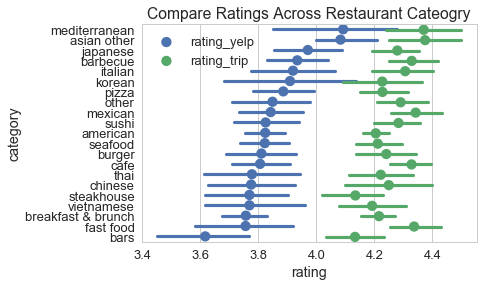

In [21]:
# create data subset (category) for plotting
cat_cmp = pd.melt(data, id_vars = ['category'], value_vars =['rating_yelp','rating_trip'],
                  var_name='website', value_name='rating')
cat_cmp['category'] = cat_cmp['category'].astype('category')
cat_cmp['category'] = cat_cmp['category'].cat.reorder_categories(list(cat_list.index))
plt.figure()
sns.despine(bottom=True, left=True)
grc1  = sns.pointplot(x='rating', y = 'category', hue = 'website', dodge=True,
              data = cat_cmp, join = False, legend = False)
grc1.legend(loc = 'upper left')
grc1.set_title('Compare Ratings Across Restaurant Cateogry')
plt.show()

This plot shows the mean and range of ratings from each website grouped by restaurant categories. The y-axis shows the categories ranked by their average ratings in Yelp. From the visualization, it is clearly shown that ratings in Tripadvisor are generally mich higher than that in Yelp. This indicates that users should be cautious to use ratings interchangeably or compare them in the two sources. Both websites rate mediterranean and asian other (Indian, Laos, Tibet, Nepal, etc.) restauratns the highest and gives bars the lowest rate. However, in the middle range, there is a substantial inconsistency between the ratings in the two websites. For example, Korean restaurants recieve high rate from Yelp but relatively low in Tripadvisor; fast food is not favored by Yelp users but are rated high in Tripadvisor.
<br><br>
This plot also compares the range of ratings across various restaurant categories and acorss websites. Firstly, Yelp ratings have large variance than that of Tripadvisor, partly due to the larger review counts in Yelp. Secondly, some types of restaurants have consistenly high ratings in the two websites, such as Japanese and Barbecue, while others have ratings that vary a lot, for example, Mediterranean and Korean. This implies that if you are in Los Angeles and pick a random Japanese restaurant, it is more likely that the restaurant is pretty good. However, if one picks a random Korean restaurant, it is harder to predict how good it will taste.
<br><br>
Below are the same analysis but applied to restaurant category by country/region and by food.

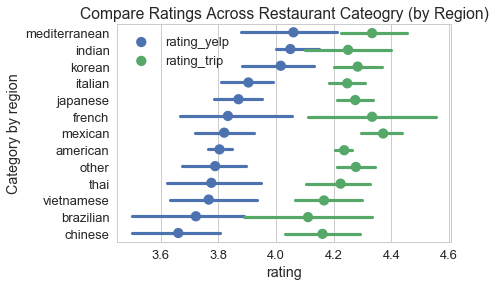

In [23]:
# create data subset (category by country/region)
cat_loc_cmp = pd.melt(data, id_vars = ['category_loc'], value_vars =['rating_yelp','rating_trip'],
                  var_name='website', value_name='rating')
cat_loc_cmp['category_loc'] = cat_loc_cmp['category_loc'].astype('category')
cat_loc_cmp['category_loc'] = cat_loc_cmp['category_loc'].cat.reorder_categories(list(cat_loc_list.index))
plt.figure()
sns.despine(bottom=True, left=True)
grc2  = sns.pointplot(x='rating', y = 'category_loc', hue = 'website', dodge=True,
              data = cat_loc_cmp, join = False, legend = False)
grc2.legend(loc = 'upper left')
grc2.set_ylabel('Category by region')
grc2.set_title('Compare Ratings Across Restaurant Cateogry (by Region)')
plt.show()

The best rated restaurant category (by region) by Yelp are Meditteranean, Indian, and Korean, while Tripadvisor users favored French, Mexican food.

[]

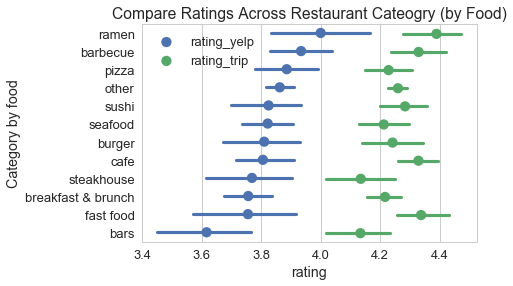

In [25]:
# create data subset (category by food)
cat_food_cmp = pd.melt(data, id_vars = ['category_food'], value_vars =['rating_yelp','rating_trip'],
                  var_name='website', value_name='rating')
cat_food_cmp['category_food'] = cat_food_cmp['category_food'].astype('category')
cat_food_cmp['category_food'] = cat_food_cmp['category_food'].cat.reorder_categories(list(cat_food_list.index))
plt.figure()
sns.despine(bottom=True, left=True)
grc3  = sns.pointplot(x='rating', y = 'category_food', hue = 'website', dodge=True,
              data = cat_food_cmp, join = False, legend = False)
grc3.legend(loc = 'upper left')
grc3.set_ylabel('Category by food')
grc3.set_title('Compare Ratings Across Restaurant Cateogry (by Food)')
plt.plot()

Here is a similar analysis performed by category by food. Both websites agree on the high ratings of Ramen and Barbecue. Yelp users also likes pizza, while Tripadvisor users favors fast food, cafe, and sushi.

### Correlation of Restaurant Ratings from Yelp and Tripadvisor
The above analysis shows that while Yelp and Tripadvisor agrees on the top and bottom rated restaurant categories, there are a lot of discrepancies in the middle range. Below, we performend a correlation analysis based of the average rating of restaurant by cateogry between the two websites. Note that, we did not perform the correlation analysis directly on instances of restaurants, because the ratings for each restaurant are non consecutive, meaning that they are categorical attribute rather than quantiative.

Correlation coefficient: 0.6836855111535406


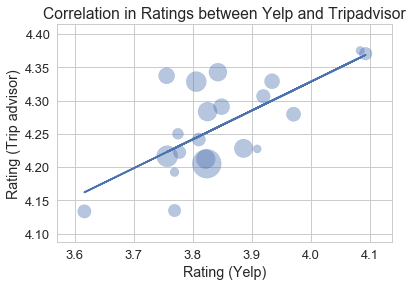

In [31]:
# aggregate by category
cat_group = data.groupby('category').agg({'rating_yelp': np.mean,
                                          'rating_trip': np.mean,
                                          'id': np.size}).reset_index()
fit = np.polyfit(cat_group['rating_yelp'], cat_group['rating_trip'], deg = 1)
r = np.corrcoef(cat_group['rating_yelp'], cat_group['rating_trip'])
print('Correlation coefficient: ' + str(r[0,1]))
f, ax = plt.subplots(1,1)
ax.scatter(x = 'rating_yelp', y = 'rating_trip', s=cat_group.id * 6,
           alpha=0.4, data = cat_group)  # markersize is given in points**2 in recentt versions of mpl
ax.plot(cat_group['rating_yelp'], cat_group['rating_yelp'] * fit[0] + fit[1])
ax.set_xlabel('Rating (Yelp)')
ax.set_ylabel('Rating (Trip advisor)')
ax.set_title('Correlation in Ratings between Yelp and Tripadvisor')
plt.show()

The correlation coefficient between the ratings (aggregated by restaurant category) of Yelp and Tripadvisor is 0.68, indicating a positive correlation. The bubble plot above shows the scatters between rating or the two restaurant and sized by the number of restaurants in each category. From the plot, it is clear to see that there are still many types of restaurant that are rated quitely different from the two websites. Below, we present two visualizations that identifies such restaurants.

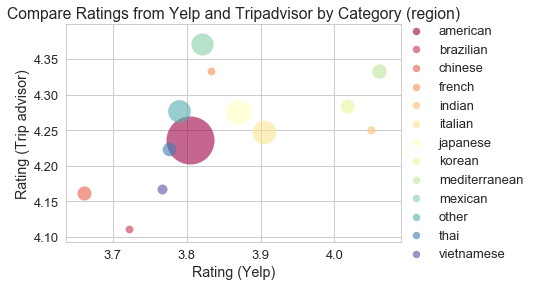

In [32]:
# aggregate by category_loc
cat_loc_group = data.groupby('category_loc').agg({'rating_yelp': np.mean,
                                          'rating_trip': np.mean,
                                          'id': np.size}).reset_index()
cat_loc_group['category_loc'] = cat_loc_group['category_loc'].astype('category')
cat_loc_group['code'] = cat_loc_group['category_loc'].cat.codes
f, ax = plt.subplots()
colors = cm.Spectral(np.linspace(0,1,cat_loc_group.shape[0]))
for i in range(cat_loc_group.shape[0]):
    ax.scatter(cat_loc_group['rating_yelp'][i], cat_loc_group['rating_trip'][i],
               s = cat_loc_group.id[i] * 6, alpha = 0.6, c = colors[i],
               label = cat_loc_group['category_loc'][i])
lgnd = ax.legend(loc = 'upper right',bbox_to_anchor=(1.4, 1.05))
for handle in lgnd.legendHandles:
   handle.set_sizes([50])
ax.set_xlabel('Rating (Yelp)')
ax.set_ylabel('Rating (Trip advisor)')
ax.set_title('Compare Ratings from Yelp and Tripadvisor by Category (region)')
plt.show()

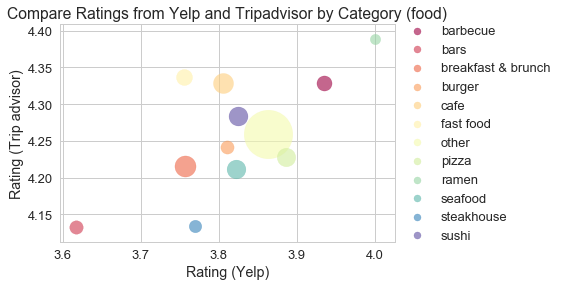

In [34]:
# aggregate by category_food
cat_food_group = data.groupby('category_food').agg({'rating_yelp': np.mean,
                                          'rating_trip': np.mean,
                                          'id': np.size}).reset_index()
cat_food_group['category_food'] = cat_food_group['category_food'].astype('category')
cat_food_group['code'] = cat_food_group['category_food'].cat.codes
f, ax = plt.subplots()
colors = cm.Spectral(np.linspace(0,1,cat_food_group.shape[0]))
for i in range(cat_food_group.shape[0]):
    ax.scatter(cat_food_group['rating_yelp'][i], cat_food_group['rating_trip'][i],
               s = cat_food_group.id[i] * 6, alpha = 0.6, c = colors[i],
               label = cat_food_group['category_food'][i])
lgnd = ax.legend(loc = 'upper right',bbox_to_anchor=(1.5, 1.05))
for handle in lgnd.legendHandles:
   handle.set_sizes([50])
ax.set_xlabel('Rating (Yelp)')
ax.set_ylabel('Rating (Trip advisor)')
ax.set_title('Compare Ratings from Yelp and Tripadvisor by Category (food)')
plt.show()

From the two visualizations above, again, we found that Mexican, French, Cafe, and Fast Food are relatively more favored by Tripadvisor users, while Yelp users prefers Steakhouse, Indian, and American foods more that those of Tripadvisor.

## Correlation of Review Counts
In this section, we examine the correlation of restaurant review counts between the two websites. Specifically, we try to answer the following questions: Do restaurants that got more reviews in Yelp also have more reviews in Tripadivosr? Does either Webiste have more restaurant reviews in general?

<Figure size 432x288 with 0 Axes>

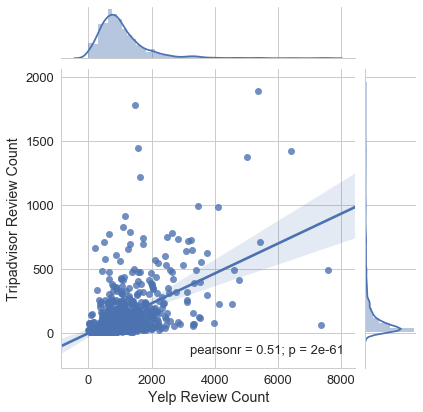

In [36]:
# compare review counts
# plot the correlation of review count between yelp and tripadvisor
plt.figure()
gc1 = sns.jointplot(x = 'review_count_yelp', y = 'review_count_trip', kind = "reg",
                   data = data)
gc1.set_axis_labels("Yelp Review Count", "Tripadvisor Review Count")
plt.show()

The above figure shows a scatter plot of the restaurant review count of each website, as well as a histogram of each. Firstly, one can see that Yelp generally has much more reviews compared to Tripadvisor. Secondly, there is a positive correlation between the two, r = 0.51, but the correlation is not very high.
<br><br>
Below, we perform a dice operation to look into restaurants that have the most reviews in both websites. There are three of them, Pink's Hog Dogs, The Griddle Cafe, and Philippe the Original. These retaurants are not pricy and also have a good rating.

In [38]:
# Dice: look into the restaurants that have a lot reviews counts
many_review = data[(data['review_count_yelp'] > 5000) & (data['review_count_trip'] > 1000)]
many_review[['name','city','category','price','rating_yelp','rating_trip',
    'review_count_yelp','review_count_trip']].head(many_review.shape[0])

,name,city,category,price,rating_yelp,rating_trip,review_count_yelp,review_count_trip
66,Pink's Hot Dogs,West Hollywood,fast food,1.0,3.5,4.0,6427,1416
129,The Griddle Cafe,Los Angeles,cafe,2.0,4.0,4.5,5028,1376
188,Philippe the Original,Los Angeles,breakfast & brunch,1.0,4.0,4.5,5361,1889


## Relationship between Review Count and Rating
In this section, we perform analysis to see if there is a relationship between restaurant rating and how such relationship differs between websites. Our general assumption is: if a restaurant has high rating, it is likely to attract more customers who will provide their review.

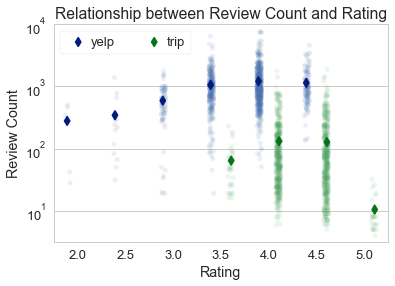

In [40]:
# correlation between review count and rating
count_rate1 = pd.melt(data, id_vars = ['name'], value_vars =['rating_yelp','rating_trip'],
                  var_name='tag', value_name='rating')
count_rate1['website'] = count_rate1['tag'].str[7:]
count_rate2 = pd.melt(data, id_vars = ['name'], value_vars =['review_count_yelp','review_count_trip'],
                  var_name='tag', value_name='review_count')
count_rate2['website'] = count_rate2['tag'].str[13:]
count_rate = pd.merge(count_rate1, count_rate2, left_on = ['name','website'],
                      right_on = ['name','website'])
# show distribution of review counts by rating, compare two websites
plt.figure()
sns.stripplot(x = 'rating', y = 'review_count',jitter = True, hue = 'website',
                    alpha = 0.1, data = count_rate, zorder = 1, dodge = True)
gc1 = sns.pointplot(x = 'rating', y = 'review_count', join = False,
              palette = 'dark', markers = 'd', scale = 0.75, ci = None,
              hue = 'website', dodge = 0.43, edgecolor = 'black', data = count_rate)
gc1.set_xlabel("Rating")
gc1.set_ylabel("Review Count")
gc1.set(yscale = 'log')
gc1.set_ylim([10 ** 0.5,10000])
gc1.set_title('Relationship between Review Count and Rating')
# improve the legend
handles, labels = gc1.get_legend_handles_labels()
gc1.legend(handles[2:], labels[2:], title=None,
          handletextpad=0, loc="upper left", ncol=3, frameon=True)
plt.show()

The above figure shows the distribution and mean of review count for each rating category in Yelp and Tripadvisor. Note that the y-axis is log-transformed to highlight the differences. From the figure, we can see a few interesting facts. First, the ratings range of Yelp (2 to 4.5) is much wider than that of Tripadvisor (3.5 to 5.0). Second, if we set aside the highest rating group in both websites, there is a general increasing trend of review count as with the increase of rating, which demonstrates our hypothesis: highly rated restaurants attracts more customers to leave their reviews. It is also noteworthy that for Yelp, most of the reviews are concentrated in the high rating end (3.5 to 4.5), while for tripadvisor, most of the reviews are given to 4 to 4.5 rated restaurants.

## Relationship between review count and price level
Following the previous section, our second hypothesis of the restaurant review count is with price level. Fancy restaurants (four dollar) might not have as much customer as mid-class ones ($$). We used the same visualization.

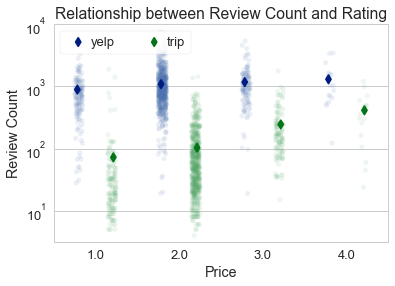

In [43]:
# correlation between review count and price level
count_price = pd.melt(data, id_vars = ['name','price'], value_vars =['review_count_yelp','review_count_trip'],
                  var_name='tag', value_name='review_count')
count_price['website'] = count_price['tag'].str[13:]
# show distribution of review counts by rating, compare two websites
plt.figure()
sns.stripplot(x = 'price', y = 'review_count',jitter = True, hue = 'website',
                    alpha = 0.1, data = count_price, zorder = 1, dodge = True)
gc1 = sns.pointplot(x = 'price', y = 'review_count', join = False,
              palette = 'dark', markers = 'd', scale = 0.75, ci = None,
              hue = 'website', dodge = 0.43, edgecolor = 'black', data = count_price)
gc1.set_xlabel("Price")
gc1.set_ylabel("Review Count")
gc1.set(yscale = 'log')
gc1.set_ylim([10 ** 0.5,10000])
gc1.set_title('Relationship between Review Count and Rating')
# improve the legend
handles, labels = gc1.get_legend_handles_labels()
gc1.legend(handles[2:], labels[2:], title=None,
          handletextpad=0, loc="upper left", ncol=3, frameon=True)
plt.show()

There is clearly an increasing trend of review count with the increase of price level in both websites. This is not as we expect. It is interesting to note that a few very pricey restaurants have the most reviews in both websites.
<br><br>
From the above two sets of analysis, we found that review count is associated with both price and rating. Therefore, we produced a headmap between to analyze the interaction of rating and price.

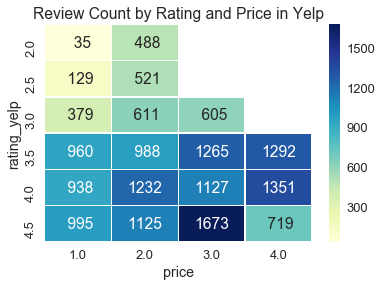

In [49]:
# Review count vs price and rating
review_cross = pd.crosstab(data['rating_yelp'],data['price'],
                           values=data['review_count_yelp'],
                           aggfunc=np.mean).round()
plt.figure()
rcr = sns.heatmap(review_cross, annot = True, fmt="4.0f",
                  cmap="YlGnBu", linewidths=.5)
rcr.set_title('Review Count by Rating and Price in Yelp')
plt.show()

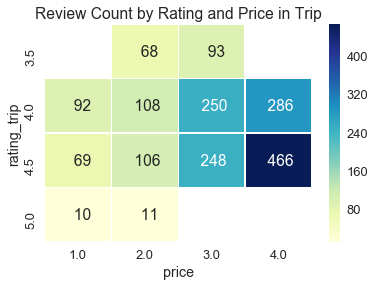

In [51]:
review_cross_trip = pd.crosstab(data['rating_trip'],data['price'],
                           values=data['review_count_trip'],
                           aggfunc=np.mean).round()
plt.figure()
rcr = sns.heatmap(review_cross_trip, annot = True, fmt="4.0f",
                  cmap="YlGnBu", linewidths=.5)
rcr.set_title('Review Count by Rating and Price in Trip')
plt.show()

## Relationship between Rating and Price Level
In this section, we examine the relationship between restaurant rating and its price level, and if such relationship differs between the two websites. Our general hypothesis is that there is a positive correlation between price and rating.

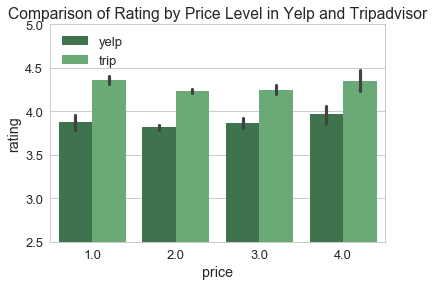

In [53]:
# compare ratings by price level
rate_price = pd.melt(data, id_vars = ['name','price'], value_vars = ['rating_yelp', 'rating_trip'],
                     var_name = 'tag', value_name = 'rating')
rate_price['website'] = rate_price['tag'].str[7:]
plt.figure()
rp1 = sns.barplot(x = 'price', y = 'rating', hue = 'website', 
                  palette="Greens_d",data = rate_price)
rp1.set_ylim([2.5, 5])
rp1.legend(loc = 'upper left',title = None)
rp1.set_title('Comparison of Rating by Price Level in Yelp and Tripadvisor')
plt.show()

The above figure shows the average restaurant ratings of each price level in the two website. In both websites, the highest ratings occurs in the highest price level, as we expect. However, the cheapest restaurants do not generally have low ratings. In tripadvisor, the cheapest restaurants on average have the same ratings as the most expensive ones. In yelp the one \$ sign restaurants have an average rating of 3.8, which is similar to '\$\$\$' restaurants. '\$\$' restaurants have the lowest rating in both websites.